### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [41]:
data = pd.read_csv('data/coupons.csv')

In [42]:
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

2. Investigate the dataset for missing or problematic data.

Looking at .info(), { 'car', 'Bar', 'CoffeeHouse', CarryAway', 'RestaurantLessThan20','Restaurant20To50'} all have missing values 

3. Decide what to do about your missing data -- drop, replace, other...

In [52]:
#I assumed that a blank value in 'RestuaranLessThan20' is equivalent to NEVER so I filled empty values with NEVER
data['RestaurantLessThan20'] = data['RestaurantLessThan20'].fillna('never')

RestaurantLessThan20
1~3      5376
4~8      3580
less1    2093
gt8      1285
never     350
dtype: int64

4. What proportion of the total observations chose to accept the coupon? 



In [6]:
y_ratio = data.value_counts('Y') / data.value_counts('Y').sum()
print(y_ratio)

Y
1    0.568433
0    0.431567
dtype: float64


5. Use a bar plot to visualize the `coupon` column.

<Axes: >

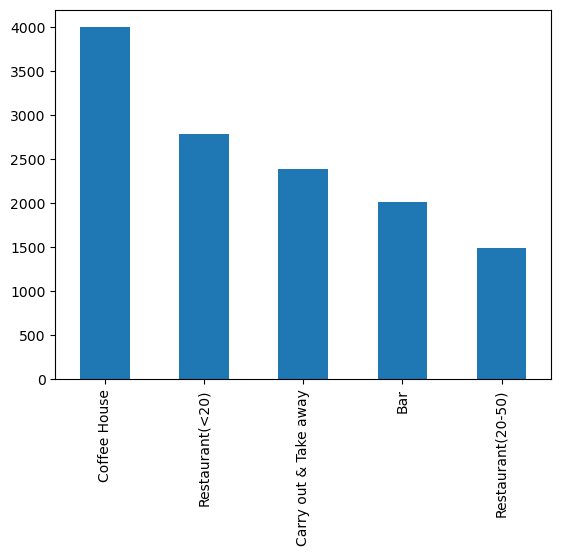

In [114]:
data.coupon.value_counts().plot(kind='bar')

6. Use a histogram to visualize the temperature column.

Text(0.5, 0, 'Temp (Degrees F)')

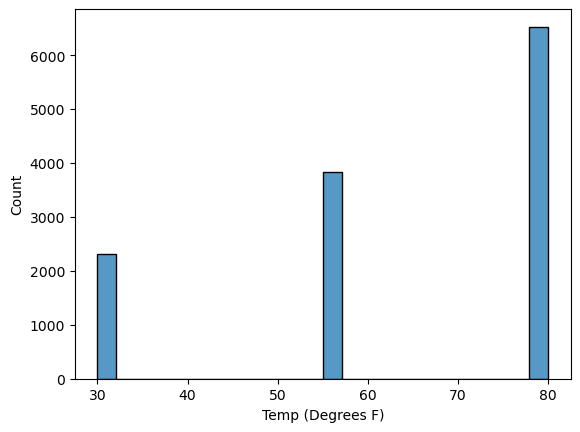

In [8]:
sns.histplot(data,x="temperature")
plt.xlabel("Temp (Degrees F)")

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [9]:
df_bar = data.query('coupon == "Bar"')
print(type(df_bar))

<class 'pandas.core.frame.DataFrame'>


2. What proportion of bar coupons were accepted?


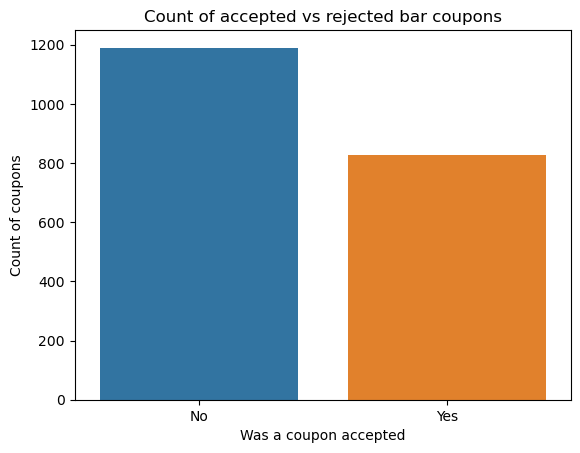

In [207]:
g = sns.countplot(data = df_bar, x = 'Y')
plt.title('Count of accepted vs rejected bar coupons')
plt.xlabel('Was a coupon accepted')
plt.ylabel('Count of coupons')
g.set_xticklabels(['No','Yes'])
plt.savefig('images/Bar_coupon1.png')

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [11]:
print('Total accepted count: ',df_bar.value_counts('Bar').sum())
less3 = ['never' , 'less1', '1~3']
more3 = ['4~8','gt8']
less3_bar = df_bar.query('Bar in @less3')['Bar'].value_counts().sum()
more3_bar = df_bar.query('Bar in @more3')['Bar'].value_counts().sum()
print('Less than 3 visits: ',less3_bar)
print('More than 3 visits: ', more3_bar)


Total accepted count:  1996
Less than 3 visits:  1797
More than 3 visits:  199


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [33]:
#Question states more than 1 visit, grouping includes 1 so I am lumping the 1~3 group into the count
more_one_bar_visit = ['1~3', '4~8','gt8']
under25 = ['below21','21']

print("More than once & over 25: ",df_bar.query('age != @under25 and Bar == @more_one_bar_visit')['Y'].mean().round(3))
print("The rest: ",df_bar.query('age == @under25 or Bar != @more_one_bar_visit')['Y'].mean().round(3))


More than once & over 25:  0.695
The rest:  0.335


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [111]:
#Following same method as above, first query builds the set where the criteria applies using AND to join.  Second
#query uses OR to build everything left

occupations = ['Farming Fishing & Forestry']
more_one_bar_visit = ['1~3', '4~8','gt8']
kids = ['Kids(s)']


print("More than once, no kids passenger, not a farmer/fisher/forrester: ",df_bar.query('occupation != @occupations and Bar == @more_one_bar_visit and passanger !=@kids')['Y'].mean().round(3))
print("The rest: ",df_bar.query('occupation == @occupations or Bar != @more_one_bar_visit or passanger ==@kids')['Y'].mean().round(3))


More than once, no kids passenger, not a farmer/fisher/forrester:  0.688
The rest:  0.293


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [129]:
more_one_bar_visit = ['1~3', '4~8','gt8']
kids = ['Kids(s)']
under30 = ['below21','21','26']
income_under50 = ['$25000 - $37499','$12500 - $24999','$37500 - $49999','Less than $12500']
lots_of_cheap = ['4~8','gt8']
widowed = ['Widowed']

print("Drivers who go to bar more than once, not kids passenger, and not widowed: ",df_bar.query('Bar ==@more_one_bar_visit and passanger != @kids and maritalStatus != @widowed')['Y'].mean().round(3))
print("Drivers who go to bar more than once and under age 30: ",df_bar.query('Bar == @more_one_bar_visit and age == @under30')['Y'].mean().round(3))
print("Drivers who go to cheap restaurants 4 times per month and make less than 50k: ",df_bar.query('RestaurantLessThan20 == @lots_of_cheap and income == @income_under50')['Y'].mean().round(3))



Drivers who go to bar more than once, not kids passenger, and not widowed:  0.688
Drivers who go to bar more than once and under age 30:  0.722
Drivers who go to cheap restaurants 4 times per month and make less than 50k:  0.453


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

**Based on the above observations, drivers are more likely to accept the bar coupons if they already go to bars & have no kids with them.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

I'm going to be looking at Coffee House coupons

In [115]:
df_coffee = data.query('coupon == "Coffee House"')
print(type(df_bar))

<class 'pandas.core.frame.DataFrame'>


What proportion were accepted?


Y
0    2001
1    1995
dtype: int64


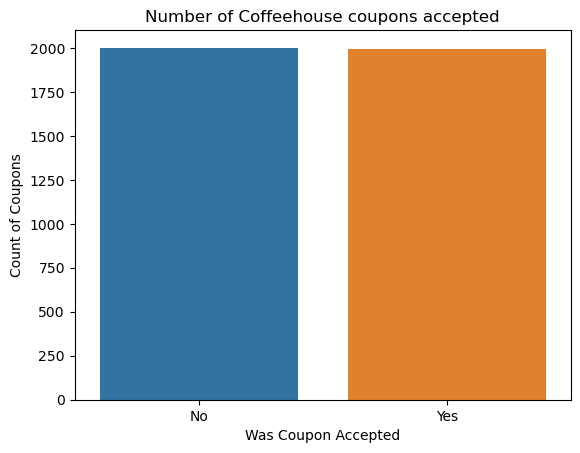

In [181]:
g=sns.countplot(data = df_coffee, x = 'Y')
plt.xlabel('Was Coupon Accepted')
plt.ylabel ('Count of Coupons')
plt.title('Number of Coffeehouse coupons accepted')
g.set_xticklabels(['No','Yes'])
plt.savefig('images/self_explore1.png')
print(df_coffee.value_counts('Y'))

In [119]:
#Looking at value_counts...going to segment data at >=1
df_coffee.value_counts('CoffeeHouse')
coffee_hi = ['1~3', '4~8', 'gt8']
coffee_low = ['less1','never']

In [122]:
print('Acceptance rate for hi visitors: ', df_coffee.query('CoffeeHouse == @coffee_hi')['Y'].mean().round(3))
print('Acceptance rate for low visitors: ', df_coffee.query('CoffeeHouse == @coffee_low')['Y'].mean().round(3))

Acceptance rate for hi visitors:  0.66
Acceptance rate for low visitors:  0.346


In [162]:
#Does income levels impact acceptance
income_under50 = ['Less than $12500','$12500 - $24999','$25000 - $37499','$37500 - $49999']
print('Acceptance rate for <50k: ', df_coffee.query('income == @income_under50')['Y'].mean().round(3))
print('Acceptance rate for >50k: ', df_coffee.query('income != @income_under50')['Y'].mean().round(3))

Acceptance rate for <50k:  0.523
Acceptance rate for >50k:  0.473


In [128]:
print('Acceptance rate for kids in car: ', df_coffee.query('passanger == "Kid(s)"')['Y'].mean().round(3))
print('Acceptance rate for no kids in car: ', df_coffee.query('passanger != "Kid(s)"')['Y'].mean().round(3))

Acceptance rate for kids in car:  0.483
Acceptance rate for no kids in car:  0.5


In [131]:
office_job = ['Student','Computer & Mathematical','Sales & Related', 'Management','Business & Financial','Legal','Architecture & Engineering','Office & Administrative Support']
print('Acceptance rate for people with office jobs: ', df_coffee.query('occupation == @office_job')['Y'].mean().round(3))
print('Acceptance rate for people not in an office: ', df_coffee.query('occupation != @office_job')['Y'].mean().round(3))

Acceptance rate for people with office jobs:  0.496
Acceptance rate for people not in an office:  0.503


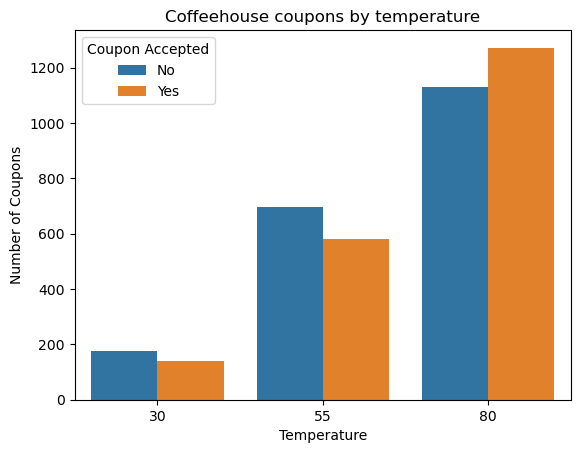

In [215]:
sns.countplot(data=df_coffee,x="temperature",hue='Y')
plt.legend(title = 'Coupon Accepted',labels =['No','Yes'])
plt.xlabel("Temperature")
plt.ylabel('Number of Coupons')
plt.title("Coffeehouse coupons by temperature")
plt.savefig('images/Coffee_by_temp.png')

In [212]:
print('Acceptance rate for hot temps: ', df_coffee.query('temperature == 80')['Y'].mean().round(3))
print('Acceptance rate for hot & work in office : ', df_coffee.query('temperature == 80 & occupation ==@office_job')['Y'].mean().round(3))


Acceptance rate for hot temps:  0.53
Acceptance rate for hot & work in office :  0.525


Acceptance rate for hi visitors & income <50k :  0.674


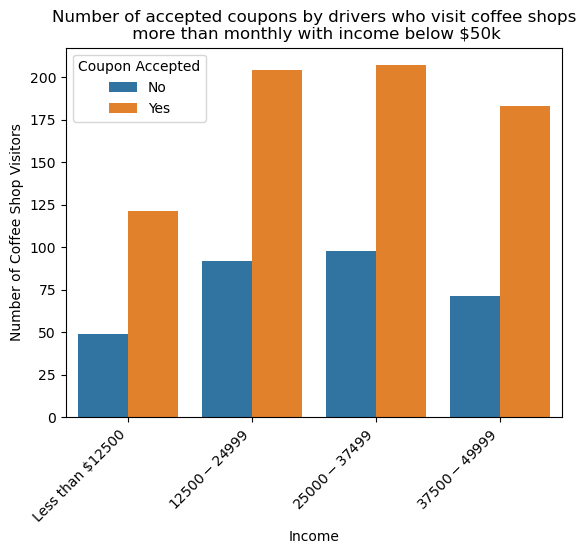

In [182]:
print('Acceptance rate for hi visitors & income <50k : ', df_coffee.query('CoffeeHouse == @coffee_hi & income ==@income_under50 & occupation ==@office_job')['Y'].mean().round(3))
sns.countplot(data=df_coffee.query('CoffeeHouse == @coffee_hi'),x="income", order = income_under50,hue='Y')
plt.xticks(rotation=45, ha="right")
plt.xlabel('Income')
plt.ylabel('Number of Coffee Shop Visitors')
plt.title('Number of accepted coupons by drivers who visit coffee shops\n more than monthly with income below $50k')
plt.legend(title="Coupon Accepted",labels = ['No','Yes'])
plt.savefig('images/self_explore2.png')